In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv("komatsu_newsscraping.csv")
df.shape

(65, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      65 non-null     object
 1   제목      65 non-null     object
 2   본문      65 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


날짜 전처리

In [4]:
date1 = df['날짜'].str.split(',').tolist()
df2 = pd.DataFrame(date1, columns=['날짜','년도'])
df2['년도'] = df2['년도'].str.strip()
df2['날짜'] = df2['날짜'].str.strip()
df2['날짜2'] = df2['날짜'].str.replace('.',' ')
df2['날짜2'] = df2['날짜2'].str.replace('  ',' ')
date2 = df2['날짜2'].str.split(' ',expand=True)
df2

<ipython-input-4-cd97014a82a9>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['날짜2'] = df2['날짜'].str.replace('.',' ')


,날짜,년도,날짜2
0,May 12,2022,May 12
1,Apr. 28,2023,Apr 28
2,April 28,2023,April 28
3,Apr. 28,2023,Apr 28
4,Apr.28,2023,Apr 28
...,...,...,...
60,Oct. 29,2021,Oct 29
61,Oct. 28,2021,Oct 28
62,Oct. 28,2021,Oct 28
63,Oct. 28,2021,Oct 28


In [5]:
df3 = pd.concat([df2, date2], axis=1)
df4 = df3[['년도',0,1]]
df4.columns = ['year','month','day']
df = pd.concat([df4, df[['제목','본문']]],axis=1)
df.head(1)

,year,month,day,제목,본문
0,2022,May,12,"-Accelerating to achieve safe, highly producti...",Komatsu Ltd. (President and CEO: Hiroyuki Og...


In [6]:
df['month'].unique()

array(['May', 'Apr', 'April', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'July', 'Jul', 'June', 'March'], dtype=object)

In [7]:
month_dic = {'May':5, 'Apr':4, 'April':4, 'Mar':3, 'Feb':2, 'Jan':1, 'Dec':12, 'Nov':11, 'Oct':10,
       'Sep':9, 'July':7, 'Jul':7, 'June':6, 'March':3}

In [8]:
df['month'] = df['month'].replace(month_dic)
df.tail(1)

,year,month,day,제목,본문
64,2021,10,27,Proterra and Komatsu announce collaboration to...,"Proterra Inc, a leading innovator in commercia..."


In [9]:
df.dtypes

year     object
month     int64
day      object
제목       object
본문       object
dtype: object

In [10]:
df['date'] = df['year'].astype(str)+'-'+ df['month'].astype(str)+'-'+df['day'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df.head()

,year,month,day,제목,본문,date
0,2022,5,12,"-Accelerating to achieve safe, highly producti...",Komatsu Ltd. (President and CEO: Hiroyuki Og...,2022-05-12
1,2023,4,28,Establishment of Subsidiary in the Republic of...,Komatsu Ltd. (President and CEO: Hiroyuki Ogaw...,2023-04-28
2,2023,4,28,Announcement Regarding Restricted Stock,Komatsu Ltd. (“Komatsu”) hereby announces with...,2023-04-28
3,2023,4,28,Notice: Difference between Non-consolidated Bu...,Komatsu Ltd. (President and CEO: Hiroyuki Ogaw...,2023-04-28
4,2023,4,28,Consolidated Business Results for the Fiscal Y...,Komatsu Ltd. today announced its consolidate...,2023-04-28


In [12]:
# 불용어 처리
word = pd.read_csv("stop_words.csv")
stop_words = word["0"].to_list()

def stop_words_out_list(words):
    result = []
    for w in words: 
        if w.strip().casefold() not in stop_words:
            result.append(w)
    return result

In [13]:
df["sentenses"] = df["본문"].map(lambda x : x.split(". "))
df["sentenses"].tail(1)

64    [Proterra Inc, a leading innovator in commerci...
Name: sentenses, dtype: object

In [14]:
df["words"] = df["본문"].replace("\.|\,|:", "", regex=True).map(lambda x : x.split(" "))
df["words"][:10]

0    [, , Komatsu, Ltd, (President, and, CEO, Hiroy...
1    [Komatsu, Ltd, (President, and, CEO, Hiroyuki,...
2    [Komatsu, Ltd, (“Komatsu”), hereby, announces,...
3    [Komatsu, Ltd, (President, and, CEO, Hiroyuki,...
4    [, , Komatsu, Ltd, today, announced, its, cons...
5    [, Komatsu, Ltd, (President, and, CEO, Hiroyuk...
6    [Komatsu, Ltd, (President, and, CEO, Hiroyuki,...
7    [Komatsu, Ltd, (President, and, CEO, Hiroyuki,...
8    [Komatsu, Ltd, (President, and, CEO, Hiroyuki,...
9    [, , Komatsu, Ltd, (hereafter, “Komatsu”), (Hi...
Name: words, dtype: object

In [52]:
df["clear_words"] = df["words"].apply(stop_words_out_list)
df["title_words"] = df["제목"].map(lambda x: x.split())
df["clear_title_words"] = df["title_words"].apply(stop_words_out_list)
df.tail()

,year,month,day,제목,본문,date,sentenses,words,clear_words,title_word,title_words,clear_title_words
60,2021,10,29,Komatsu Agrees to Dissolve Shantui Constructio...,Komatsu Ltd. (hereafter “Komatsu”) (President ...,2021-10-29,"[Komatsu Ltd, (hereafter “Komatsu”) (President...","[Komatsu, Ltd, (hereafter, “Komatsu”), (Presid...","[Komatsu, Ltd, (hereafter, “Komatsu”), (Presid...","[Komatsu, Agrees, to, Dissolve, Shantui, Const...","[Komatsu, Agrees, to, Dissolve, Shantui, Const...","[Komatsu, Agrees, Dissolve, Shantui, Construct..."
61,2021,10,28,Notice: Dividends from Retained Earnings,Komatsu Ltd. (President and CEO: Hiroyuki Ogaw...,2021-10-28,"[Komatsu Ltd, (President and CEO: Hiroyuki Oga...","[Komatsu, Ltd, (President, and, CEO, Hiroyuki,...","[Komatsu, Ltd, (President, CEO, Hiroyuki, Ogaw...","[Notice:, Dividends, from, Retained, Earnings]","[Notice:, Dividends, from, Retained, Earnings]","[Notice:, Dividends, Retained, Earnings]"
62,2021,10,28,Announcement Concerning the Revision of Projec...,"Komatsu Ltd. (""Company"") (President and CEO: H...",2021-10-28,"[Komatsu Ltd, (""Company"") (President and CEO: ...","[Komatsu, Ltd, (""Company""), (President, and, C...","[Komatsu, Ltd, (""Company""), (President, CEO, H...","[Announcement, Concerning, the, Revision, of, ...","[Announcement, Concerning, the, Revision, of, ...","[Announcement, Concerning, Revision, Projected..."
63,2021,10,28,Consolidated Business Results for Six Months o...,Komatsu Ltd. today announced its consolidated ...,2021-10-28,"[Komatsu Ltd, today announced its consolidated...","[Komatsu, Ltd, today, announced, its, consolid...","[Komatsu, Ltd, today, announced, consolidated,...","[Consolidated, Business, Results, for, Six, Mo...","[Consolidated, Business, Results, for, Six, Mo...","[Consolidated, Business, Results, Six, Months,..."
64,2021,10,27,Proterra and Komatsu announce collaboration to...,"Proterra Inc, a leading innovator in commercia...",2021-10-27,"[Proterra Inc, a leading innovator in commerci...","[Proterra, Inc, a, leading, innovator, in, com...","[Proterra, Inc, leading, innovator, commercial...","[Proterra, and, Komatsu, announce, collaborati...","[Proterra, and, Komatsu, announce, collaborati...","[Proterra, Komatsu, announce, collaboration, e..."


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=850, background_color="white", random_state=0)

In [54]:
text = df['clear_words'][0]

In [55]:
text[:10]

['',
 '',
 'Komatsu',
 'Ltd',
 '(President',
 'CEO',
 'Hiroyuki',
 'Ogawa)',
 'developed',
 'concept']

In [56]:
text1 = ' '.join(text)

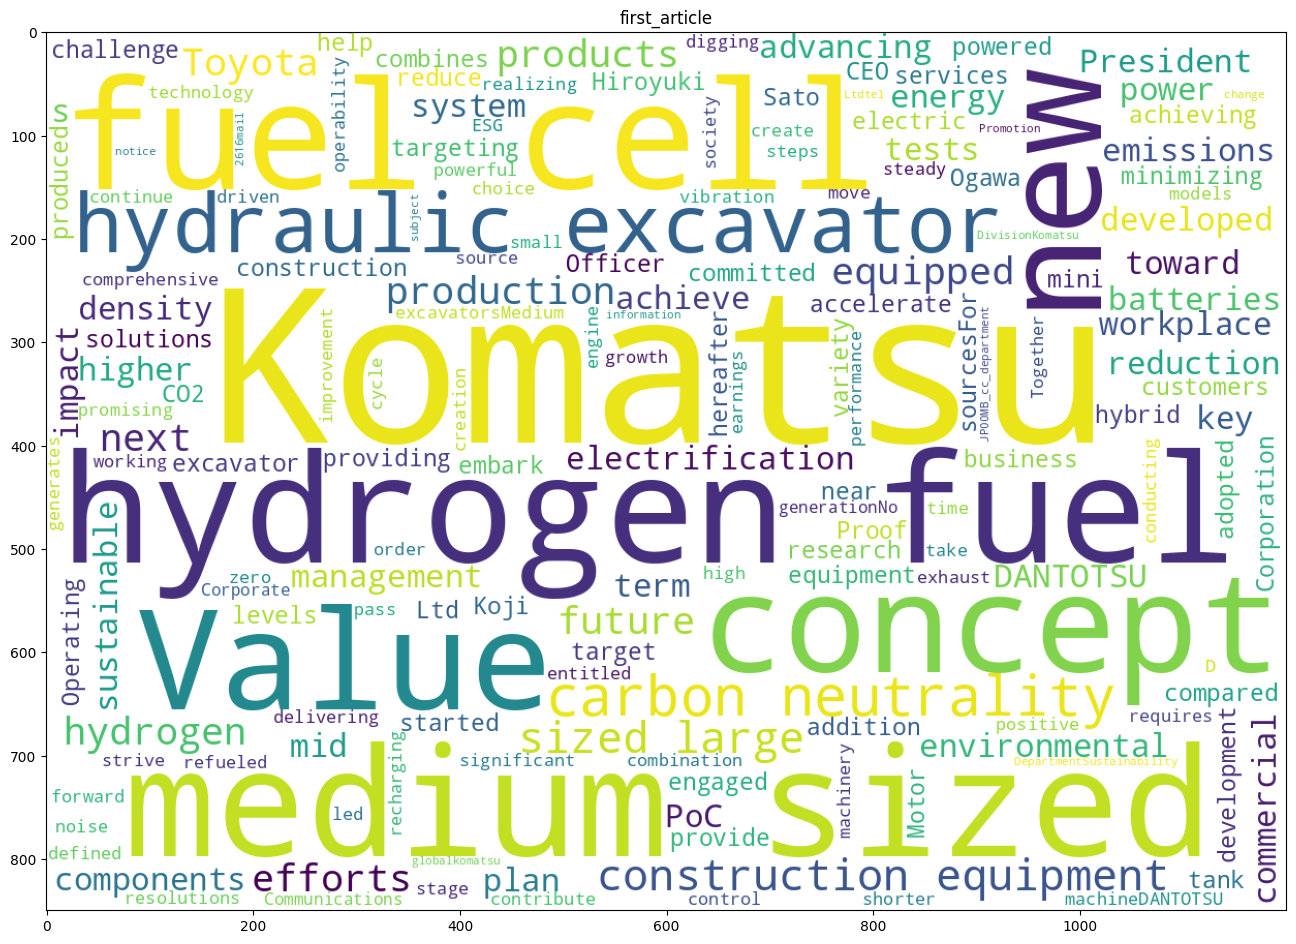

In [57]:
plt.figure(figsize=(16, 12))
plt.title("first_article")
plt.imshow(wc.generate(text1))

In [58]:
clear_words_list = df['clear_words'].to_list()
clear_title_words_list = df['clear_title_words'].to_list()

In [59]:
clear_words_txt = ''.join(map(str, clear_words_list))

In [60]:
clear_title_words_txt = ''.join(map(str, clear_title_words_list))

In [61]:
# 특수문자 제거
import re
word_list = re.findall('[a-zA-Z0-9]+',clear_words_txt)
title_word_list = re.findall('[a-zA-Z0-9]+',clear_title_words_txt)

In [62]:
pd.Series(word_list).value_counts()

Komatsu       610
s             202
business      149
equipment     130
new           122
             ... 
KPI             1
Guaranteed      1
ICMA            1
Market          1
3072            1
Length: 4103, dtype: int64

In [63]:
pd.Series(title_word_list).value_counts()

Komatsu         39
Business        12
Results         11
Fiscal           9
Notice           9
                ..
USD              1
Linked           1
achievement      1
accelerating     1
entry            1
Length: 457, dtype: int64

In [65]:
# 태블로를 위한 문자열 파일 완성
# pd.Series(word_list).to_csv('komatsu_word_list.csv')
# pd.Series(title_word_list).to_csv('komatsu_title_word_list.csv')